In [12]:
# gerekli kütüphaneler
!pip install pandas scikit-learn matplotlib seaborn


In [14]:
# dosyayı yükle

import pandas as pd

dataset = pd.read_csv('breast-cancer.csv')

# verisetinin ilk 5 satırını gösterme
print(dataset.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [15]:
# verisetini özellikler ve etiket olarak ayırma
data = dataset.drop(['diagnosis', 'id'], axis=1)
label = dataset['diagnosis']

In [16]:
# sütunları ve veri tiplerini gösterme
print("Veri Tipleri:")
print(data.dtypes)

print("Özellikler:")
print(data.columns)

Veri Tipleri:
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmet

In [17]:
# string verileri sayısal verilere dönüştürme

label = label.map({'M': 1, 'B': 0})
print("Etiketler:")
print(label.head())


Etiketler:
0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [18]:
# verisetini olusturma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)


In [19]:
# verileri ölçeklendirme
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# en iyi model parametrelerini bulma
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga', 'newton-cg', 'liblinear', 'sag'], 
}

model = LogisticRegression(max_iter=100000)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi modelin skoru:", grid_search.best_score_)

En iyi hiperparametreler: {'C': 0.1, 'solver': 'liblinear'}
En iyi modelin skoru: 0.9780219780219781


In [21]:
# modeli en iyi hiperparametrelerle yeniden eğitme
best_model = LogisticRegression(**grid_search.best_params_, max_iter=100000)
best_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100000
,multi_class,'deprecated'


In [22]:
# modelin başarısını değerlendirme
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = best_model.predict(X_test)
print("Tahminler:", y_pred)
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))


Tahminler: [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]
Doğruluk Skoru: 0.9912280701754386
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Karışıklık Matrisi:
 [[71  0]
 [ 1 42]]


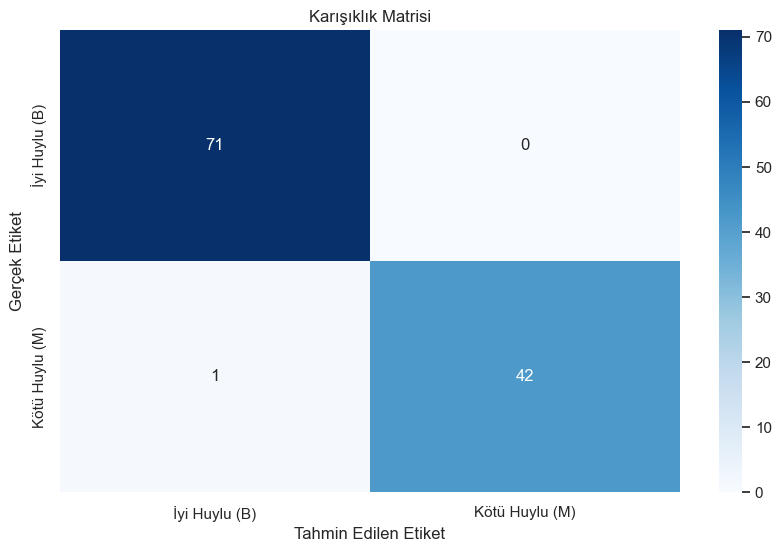

In [23]:
# model sonuclarini görselleştirme


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['İyi Huylu (B)', 'Kötü Huylu (M)'], yticklabels=['İyi Huylu (B)', 'Kötü Huylu (M)'])
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

In [24]:
# modeli kaydetme
import joblib
joblib.dump(best_model, 'breast_cancer_classification_model.pkl')



['breast_cancer_classification_model.pkl']

# TAHMİN

In [25]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Eğitilmiş modeli yükle
model = joblib.load('breast_cancer_classification_model.pkl')


In [26]:
# Orijinal veri yapısını yükle ve ölçeklendirme için sütunları hazırla
df = pd.read_csv('breast-cancer.csv')
data = df.drop(['diagnosis', 'id'], axis=1)

# Scaler'ı tüm veri seti üzerinde eğit
scaler = StandardScaler()
scaler.fit(data)

,copy,True
,with_mean,True
,with_std,True


In [27]:
def predict_cancer(input_features: dict) -> str:
    """
    Ölçüm değerlerini içeren bir dict alır ve kanser tahmini yapar.
    1: Kötü Huylu (M), 0: İyi Huylu (B)
    """
    user_df = pd.DataFrame([input_features])
    # Sütun sırasını eğitim verisi ile eşitle
    user_df = user_df[data.columns]
    # Ölçeklendir
    user_scaled = scaler.transform(user_df)
    # Tahmin
    pred = model.predict(user_scaled)[0]
    return 'Kötü Huylu (M)' if pred == 1 else 'İyi Huylu (B)'


In [28]:
import tkinter as tk

def get_user_input(data):
    root = tk.Tk()
    root.title("Kanser Tahmin Aracı")

    features = {}

    def submit():
        for col in data.columns:
            try:
                val = float(entries[col].get())
                features[col] = val
            except ValueError:
                print(f"{col} için geçerli bir sayı giriniz.")
        root.destroy()

    entries = {}
    num_columns = 3
    num_rows = len(data.columns) // num_columns + 1

    for idx, col in enumerate(data.columns):
        row = idx % num_rows
        col_idx = idx // num_rows

        label = tk.Label(root, text=col)
        label.grid(row=row, column=col_idx * 2, padx=5, pady=2, sticky="e")

        entry = tk.Entry(root)
        entry.grid(row=row, column=col_idx * 2 + 1, padx=5, pady=2, sticky="w")

        entries[col] = entry

    # Submit düğmesi en alta
    submit_button = tk.Button(root, text="Tahmin Et", command=submit)
    submit_button.grid(row=num_rows+1, column=0, columnspan=num_columns * 2, pady=10)

    root.mainloop()
    return features


In [29]:

if __name__ == '__main__':
    print("Kullanıcıdan ölçüm değerlerini alıyoruz...")
    user_input = get_user_input(data)
    prediction = predict_cancer(user_input)
    print(f"Tahmin Sonucu: {prediction}")

Kullanıcıdan ölçüm değerlerini alıyoruz...
Tahmin Sonucu: İyi Huylu (B)
Tahmin Sonucu: İyi Huylu (B)
